# 13 Function Transformation

# Function Transformation is used for the conversion of a column containing a not normal distribution into normal distribution

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('loan.csv')

In [2]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

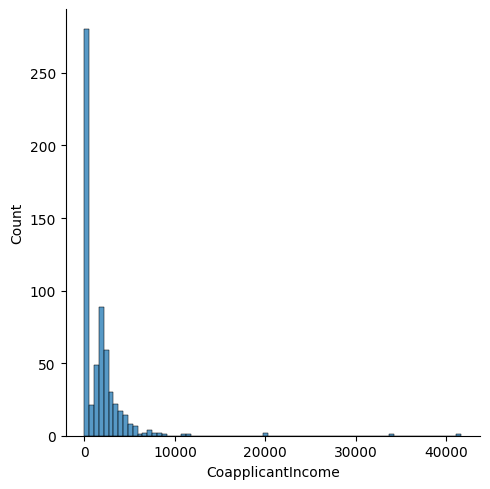

In [4]:
sns.displot(dataset['CoapplicantIncome'])
plt.show()

In [5]:
# IQR method
q1 = dataset['CoapplicantIncome'].quantile(0.25)
q3 = dataset['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

In [6]:
min_r = q1 - (1.5 * iqr)
max_r = q3 + (1.5 * iqr)
min_r, max_r

(-3445.875, 5743.125)

In [7]:
new = dataset[dataset['CoapplicantIncome']<=max_r]
# new

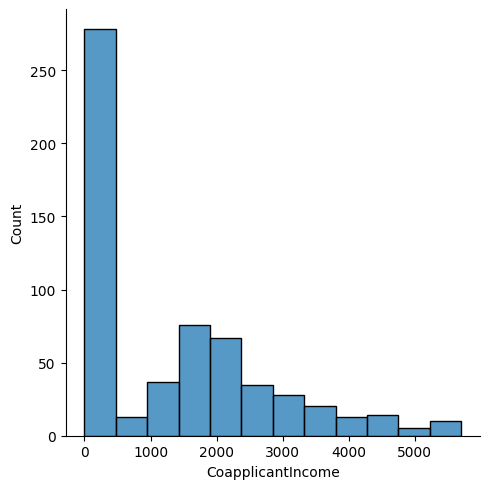

In [8]:
sns.displot(new['CoapplicantIncome'])
plt.show()

In [9]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [10]:
ft = FunctionTransformer(func=np.log1p) # log1p prevents from data tending towards infinity

In [11]:
# this is in the dataset with outliers
ft.fit(dataset['CoapplicantIncome'])

FunctionTransformer(func=<ufunc 'log1p'>)

In [12]:
dataset['CoapplicantIncome_tf'] = ft.transform(dataset[['CoapplicantIncome']])

<function matplotlib.pyplot.show(close=None, block=None)>

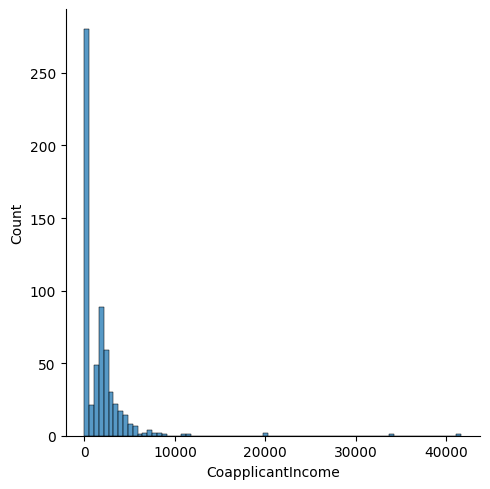

In [13]:
sns.displot(dataset['CoapplicantIncome'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

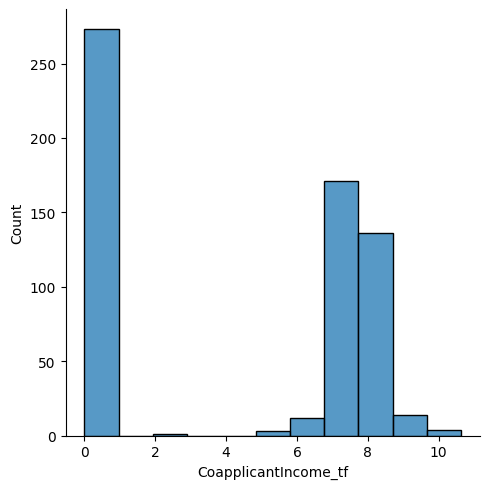

In [14]:
sns.displot(dataset['CoapplicantIncome_tf'])
plt.show

In [15]:
# for the dataset without outliers. Outliers were removed by iqr method.
ft.fit(new[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
new['CoapplicantIncome_tf'] = ft.transform(new[['CoapplicantIncome']])

C:\Users\ACER\AppData\Local\Temp\ipykernel_21704\3832300766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['CoapplicantIncome_tf'] = ft.transform(new[['CoapplicantIncome']])


<function matplotlib.pyplot.show(close=None, block=None)>

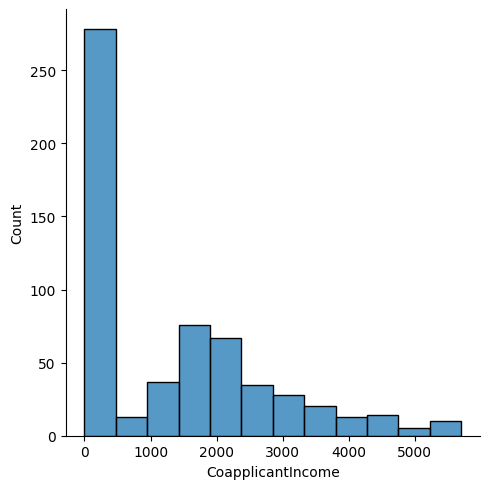

In [17]:
sns.displot(new['CoapplicantIncome'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

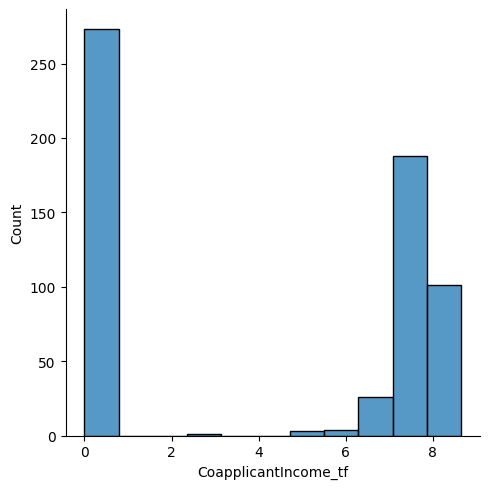

In [18]:
sns.displot(new['CoapplicantIncome_tf'])
plt.show

In [19]:
# with different function
ft1 = FunctionTransformer(func= lambda x : x**2)
ft1.fit(new[['CoapplicantIncome']])
new['CoapplicantIncome_tf1'] = ft.transform(new[['CoapplicantIncome']])

C:\Users\ACER\AppData\Local\Temp\ipykernel_21704\1884021314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['CoapplicantIncome_tf1'] = ft.transform(new[['CoapplicantIncome']])


<function matplotlib.pyplot.show(close=None, block=None)>

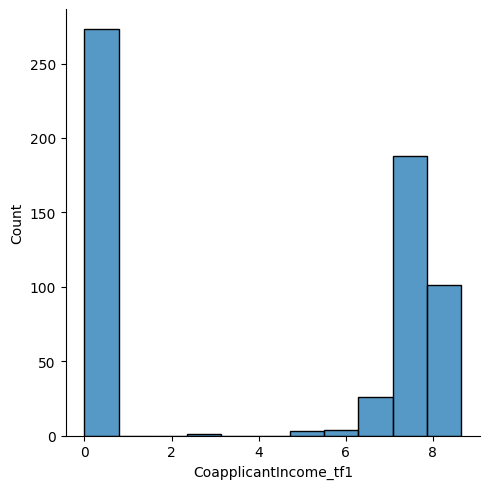

In [20]:
sns.displot(new['CoapplicantIncome_tf1'])
plt.show